In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from loess import loess_1d

import sys
sys.path.insert(0,'..')
from BMR.ml_models import *

plt.rcParams['figure.figsize'] = [8, 5.5]

# set seed
random.seed(1234)

# TODO: should we use StatsModels instead of sklearn?
#import statsmodels.api as sm

In [2]:
from sklearn.neighbors import RadiusNeighborsRegressor

In [3]:
x = np.sort(ss.uniform().rvs(size=100)*10*np.pi)
x_test = np.sort(ss.uniform().rvs(size=50)*10*np.pi)
y = np.cos(x)*np.exp(-0.05*x) + ss.norm(scale=0.05).rvs(size=100)

/home/rafal/WORK/IMPAN/LocalRegression/venv/lib/python3.8/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/home/rafal/WORK/IMPAN/LocalRegression/venv/lib/python3.8/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


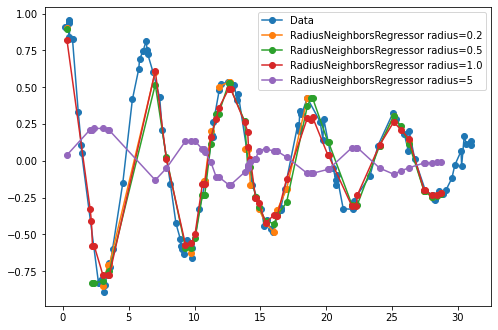

In [4]:
plt.plot(x, y, 'o-', label='Data')
for radius in [0.2, 0.5, 1.0, 5]:
    neigh = RadiusNeighborsRegressor(radius=radius)
    neigh.fit(x.reshape(-1,1), y)
    plt.plot(x_test, neigh.predict(x_test.reshape(-1,1)), 'o-', label=f'RadiusNeighborsRegressor radius={radius}')
plt.legend()

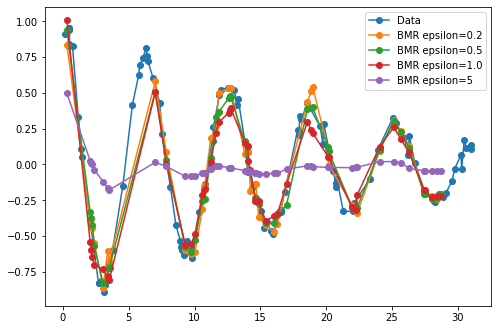

In [5]:
# do the same data with BMR
plt.plot(x, y, 'o-', label='Data')
for epsilon in [0.2, 0.5, 1.0, 5]:
    bmr = BMR(min_n_pts=10, M=25, substitution_policy='nearest', degree=1, epsilon=epsilon)
    bmr.fit(x.reshape(-1,1), y)
    plt.plot(x_test, bmr.predict(x_test.reshape(-1,1)), 'o-', label=f'BMR epsilon={epsilon}')
plt.legend()

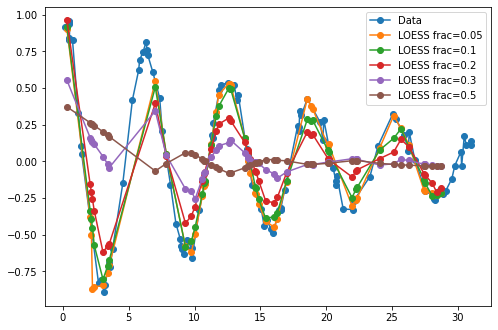

In [7]:
# do the same with LOESS
plt.plot(x, y, 'o-', label='Data')
for frac in [0.05, 0.1, 0.2, 0.3, 0.5]:
    xout, yout, wout = loess_1d.loess_1d(x, y, x_test, degree=1, frac=frac)
    plt.plot(x_test, yout, 'o-', label=f'LOESS frac={frac}')
plt.legend()